# Sentiment Analysis with data from Twitter 
## To replicate the sentiment analysis with data from twitter:
### A. Start a notebook instance in machine Learning Lab 
### B. Open the example link and download the source code from Github repository.
### C. Sign up for <a href="https://developer.twitter.com/en/support/twitter-api/developer-account">a developer account in Twitter</a>
### D. Copy, paste and modify the python code file in the notebook
### E. Push the repository to GitHub

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 23.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 41.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 90.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=170ac601ca317d97f6c663f6d07ae032a6c7971f7c8e749fe3a2142b57544a1e
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d32213f7


In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [4]:
# Authentication
consumerKey = "cLZLUBozu5MMDlEwQJ1pUJi6E"
consumerSecret = "aaPnTfjLuayFsaKiaRBrHkXv3S3vNZCnJWWWWojHcc5DeLI4of"
accessToken = "1628237273387962369-2Y5GDuRxZidAShmRj5bnWdPmzYV2dM"
accessTokenSecret = "AVx6Tz0DTslJk9cw8pEvgRuFBUh97Iv2euwtlE0V3g3ct"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  30


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  30
positive number:  0
negative number:  4
neutral number:  26


In [7]:
tweet_list[0:20]

,0
0,RT @escorial_alvaro: 15 años de la película qu...
1,@Peli_Comic El UCM empezó y terminó con Iron m...
2,RT @nekochanfood: 奈良坂さんが言っていた通り、レジストリ内にあるFrien...
3,RT @narazaka: FriendsPerLocation.なんとやらっていうキーが大...
4,@ErnestoMCruz1 @DiazCanelB @AlmaguerPerdomo @C...
5,RT @escorial_alvaro: 15 años de la película qu...
6,RT @MeriStation: 🤔 Margot Robbie... ¿también e...
7,RT @escorial_alvaro: 15 años de la película qu...
8,@FACSmirnov @ULTCuba @26deLasTunas @gobiernotu...
9,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...


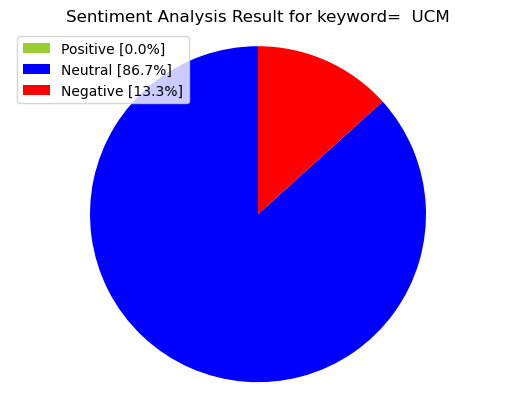

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @escorial_alvaro: 15 años de la película qu...,RT @escorial_alvaro: 15 años de la película qu...
1,@Peli_Comic El UCM empezó y terminó con Iron m...,@Peli_Comic El UCM empezó y terminó con Iron m...
2,RT @nekochanfood: 奈良坂さんが言っていた通り、レジストリ内にあるFrien...,RT @nekochanfood: 奈良坂さんが言っていた通り、レジストリ内にあるFrien...
3,RT @narazaka: FriendsPerLocation.なんとやらっていうキーが大...,RT @narazaka: FriendsPerLocation.なんとやらっていうキーが大...
4,@ErnestoMCruz1 @DiazCanelB @AlmaguerPerdomo @C...,@ErnestoMCruz1 @DiazCanelB @AlmaguerPerdomo @C...
6,RT @MeriStation: 🤔 Margot Robbie... ¿también e...,RT @MeriStation: 🤔 Margot Robbie... ¿también e...
8,@FACSmirnov @ULTCuba @26deLasTunas @gobiernotu...,@FACSmirnov @ULTCuba @26deLasTunas @gobiernotu...
9,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...
10,15 años de la película que cambiaría para siem...,15 años de la película que cambiaría para siem...
12,RT @cadenapolitica: Guardianes de la Galaxia V...,RT @cadenapolitica: Guardianes de la Galaxia V...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @escorial_alvaro: 15 años de la película qu...,15 a os de la pel cula que cambiar a para sie...
1,@Peli_Comic El UCM empezó y terminó con Iron m...,comic el ucm empez y termin con iron man ...
2,RT @nekochanfood: 奈良坂さんが言っていた通り、レジストリ内にあるFrien...,friendsperlocation ...
3,RT @narazaka: FriendsPerLocation.なんとやらっていうキーが大...,friendsperlocation ...
4,@ErnestoMCruz1 @DiazCanelB @AlmaguerPerdomo @C...,vclara
6,RT @MeriStation: 🤔 Margot Robbie... ¿también e...,margot robbie tambi n en el ucm 4 la...
8,@FACSmirnov @ULTCuba @26deLasTunas @gobiernotu...,lastunas cuba toda cub
9,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...,subt tulos de calidad marvel marvelstud...
10,15 años de la película que cambiaría para siem...,15 a os de la pel cula que cambiar a para siem...
12,RT @cadenapolitica: Guardianes de la Galaxia V...,guardianes de la galaxia vol 3 llega para sa...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_10098/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @escorial_alvaro: 15 años de la película qu...,15 a os de la pel cula que cambiar a para sie...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
1,@Peli_Comic El UCM empezó y terminó con Iron m...,comic el ucm empez y termin con iron man ...,0.250000,0.500000,neutral,0.0,1.000,0.000,0.0000
2,RT @nekochanfood: 奈良坂さんが言っていた通り、レジストリ内にあるFrien...,friendsperlocation ...,0.033333,0.066667,neutral,0.0,1.000,0.000,0.0000
3,RT @narazaka: FriendsPerLocation.なんとやらっていうキーが大...,friendsperlocation ...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
4,@ErnestoMCruz1 @DiazCanelB @AlmaguerPerdomo @C...,vclara,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
6,RT @MeriStation: 🤔 Margot Robbie... ¿también e...,margot robbie tambi n en el ucm 4 la...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
8,@FACSmirnov @ULTCuba @26deLasTunas @gobiernotu...,lastunas cuba toda cub,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
9,RT @zebazcr: Subtítulos de calidad… 🚬\n\n#Marv...,subt tulos de calidad marvel marvelstud...,0.000000,0.000000,positive,0.0,0.682,0.318,0.4215
10,15 años de la película que cambiaría para siem...,15 a os de la pel cula que cambiar a para siem...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
12,RT @cadenapolitica: Guardianes de la Galaxia V...,guardianes de la galaxia vol 3 llega para sa...,0.000000,0.000000,positive,0.0,0.823,0.177,0.4215


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,19,76.0
negative,4,16.0
positive,2,8.0


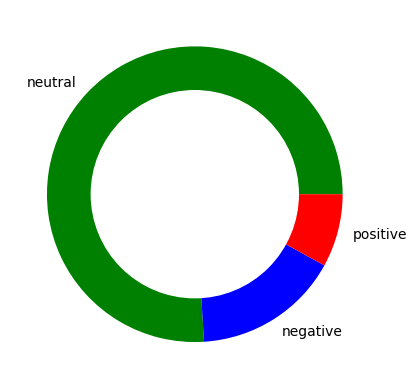

In [17]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [20]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



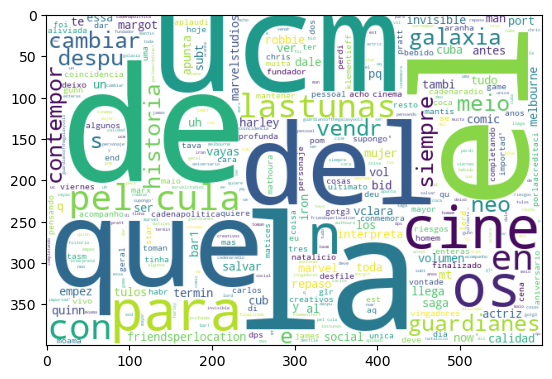

In [21]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

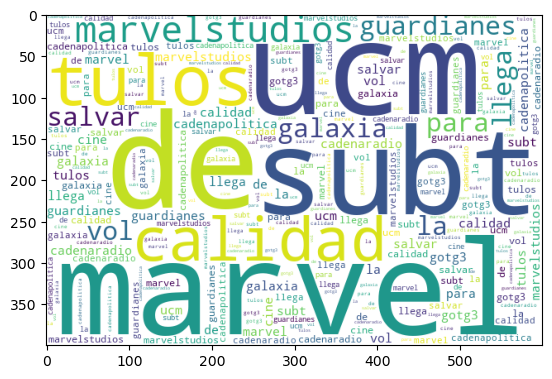

In [22]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

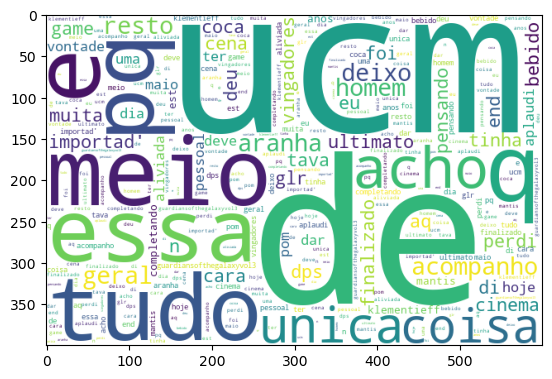

In [23]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

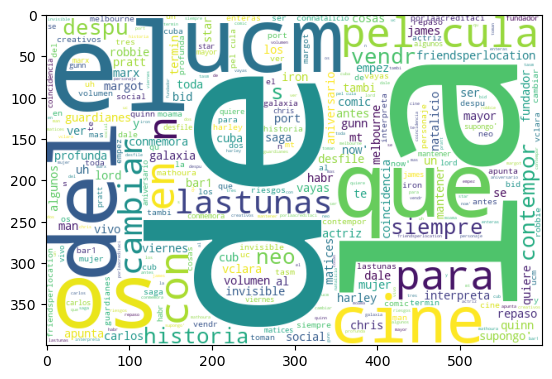

In [24]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)